---

#<h2 style="text-align: center;"><b>Многослойная сеть на Keras</b></h3>

---

##<h3 style="text-align: center;"><b>Компоненты нейросети</b></h3>

Здесь самое время напомнить о том, какие вещи играют принципиальную роль в построении любой ***нейронной сети*** (все их мы задаём *руками*, самостоятельно):  

- непосредственно, сама **архитектура** нейросети (сюда входят типы функций активации у каждого нейрона);
- начальная **инициализация** весов каждого слоя;
- метод **оптимизации** нейросети (сюда ещё входит метод изменения `learning_rate`);
- размер **батчей** (`batch_size`);
- количество итераций обучения (`num_epochs`);
- **функция потерь** (`loss`);  
- тип **регуляризации** нейросети (для каждого слоя можно свой);  

То, что связано с ***данными и задачей***:  
- само **качество** выборки (непротиворечивость, чистота, корректность постановки задачи);  
- **размер** выборки;  

##<h3 style="text-align: center;"><b>Многослойная нейронная сеть</b></h3>

Как можно понять из названия, многослойная нейросеть состоит из нескольких **слоёв**. Каждый слой состоит из **нейронов**. Ранее мы уже писали свой нейрон на NumPy, вот из таких нейронов и состоит ***MLP (Multi-Layer Perceptron)***. Ещё такую многослойную нейросеть, у которой каждый нейрон на предыдущем уровне соединён с нейроном на следующем уровне, называют ***Fully-Connected-сетью*** (или ***Dense-сетью***).  

Расмотрим их устройство более подробно:

* Вот так выглядит двухслойная нейросеть (первый слой - input layer - не считается, потому что это, по сути, не слой):

<img src="http://cs231n.github.io/assets/nn1/neural_net.jpeg" width=300, height=200>

* Так выглядит трёхслойная нейросеть:

<img src="http://cs231n.github.io/assets/nn1/neural_net2.jpeg" width=400, height=300>

.. и так далее для большего случая слоёв.

**Обратите внимание:** связи есть у нейронов со слоя $L_{i-1}$  и нейронов $L_{i}$, но между нейронами в одном слое связей **нет**.

**Входной слой** -- это данные (матрица $(n, m)$).

Слои, которые не являются входными или выходными, называются **скрытыми слоями (hidden layers)**.

При решении ***задачи регрессии*** на **выходном слое** обычно один нейрон, который возвращает предсказанные числа (для каждого объекта по числу).  

В случае ***задачи классификации*** на **выходном слое** обычно один нейрон, если задача бинарной классификации, и $K$ нейронов, если задача $K$-класовой классификации.

#### Forward pass в MLP

Каждый слой многослойной нейросети - это матрица весов, столбцы которой -- это нейроны (один столбец - один нейрон). То есть один столбец -- это веса одного нейрона.

Допустим, мы решаем задачу $K$-классовой классификации (на последнем слое $K$ нейронов). Рассмотрим, как в таком случае выглядит `forward_pass` нейросети:

* Вход: $$X =
\left(
\begin{matrix}
x_{11} & ... & x_{1M} \\
... & \ddots  & ...\\
x_{N1} & ... & x_{NM}
\end{matrix}
\right)
$$

-- матрица $(N, M)$

* Структура сети - много слоёв, в слоях много нейронов. Первый слой (после входного) выглядит так:

$$ W^1 =
\left(
\begin{matrix}
w_{11} & ... & w_{1L_1} \\
... & \ddots  & ...\\
w_{M1} & ... & w_{ML_1}
\end{matrix}
\right)
$$

-- матрица $(M, L_1)$

То есть это в точности $L_1$ нейронов, каждый имеет свои собственные веса, их $M$ штук.

Мы помним, что нейрон - это линейное преобразование и потом нелинейная функция активации от этого преобразования. Однако в многослойных нейростеях часто отделяют `Linear` часть и `Activation`, то есть слоем считаем набор весов нейронов, а следующий слой всегда функция активации (у всех нейронов из слоя она одна и та же, обычно фреймворки не позволяют задавать конкретному нейрону в слое отличную от других нейронов в этом слое функцию активации, однако это легко сделать, объявив слой из одного нейрона).

* Другие слои выглядит точно так же, как первый слой. Например, второй слой будет такой:

$$ W^2 =
\left(
\begin{matrix}
w_{11} & ... & w_{1L_2} \\
... & \ddots  & ...\\
w_{L_11} & ... & w_{L_1L_2}
\end{matrix}
\right)
$$

-- матрица $(L_1, L_2)$

То есть это в точности $L_2$ нейронов, каждый имеет свои собственные веса, их $L_1$ штук.

* Выходной слой:  

Пусть в нейросети до выходного слоя идут $t$ слоёв. Тогда выходной слой имеет форму:

$$ W^{out} =
\left(
\begin{matrix}
w_{11} & ... & w_{1K} \\
... & \ddots  & ...\\
w_{L_t1} & ... & w_{L_tK}
\end{matrix}
\right)
$$

-- матрица $(L_t, K)$, где $L_t$ - количество нейронов в $t$-ом слое, а $K$ -- количество классов.

В итоге *для `forward_pass` нам нужно просто последовтельно перемножить матрицы друг за другом, применяя после каждого умножения соответсвующую функцию активации*.

*Примечание*: можно думать об умножении на очередную матрицу весов как на переход в **новое признаковое пространство**. Действительно, когда подаём матрицу $X$ и умножаем на матрицу первого слоя, мы получаем матрицу размера $(N, L_1)$, то есть как будто $L_1$ "новых" признаков (построенных как линейная комбинация старых до применения функции активации, и уже как нелинейная комбинация после активации). Здесь уместно вспомнить, что Deep Learning является пообластью Representation Learning, то есть позволяет выучивает новые представляения данных.

**Backward pass в MLP**

Обучается с помощью метода "Error Backpropagation" - ["Обратное распространение ошибки"](https://ru.wikipedia.org/wiki/%D0%9C%D0%B5%D1%82%D0%BE%D0%B4_%D0%BE%D0%B1%D1%80%D0%B0%D1%82%D0%BD%D0%BE%D0%B3%D0%BE_%D1%80%D0%B0%D1%81%D0%BF%D1%80%D0%BE%D1%81%D1%82%D1%80%D0%B0%D0%BD%D0%B5%D0%BD%D0%B8%D1%8F_%D0%BE%D1%88%D0%B8%D0%B1%D0%BA%D0%B8), принцип распространения очень похож на то, как мы обучали один нейрон - это градиентный спуск, но по "всей нейросети" сразу.  

Backpropagation работает корректно благодаря ***chain rule*** (=правилу взятия производной сложной функции):  

Если $f(x) = f(g(x))$, то:  

$$\frac{\partial{f}}{\partial{x}} = \frac{\partial{f}}{\partial{g}} \frac{\partial{g}}{\partial{x}}$$

Более подробно про backpropagation можно прочитать здесь (на английском):  https://mattmazur.com/2015/03/17/a-step-by-step-backpropagation-example/

#Создание двухслойной нейросети
Cоздадим двухслойную нейросеть из 100 нейронов:

In [1]:
import matplotlib.pyplot as plt
import numpy as np

import keras

2025-10-03 13:53:36.023842: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2025-10-03 13:53:36.029640: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-10-03 13:53:36.231979: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI AVX512_BF16 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-10-03 13:53:36.979687: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different compu

Генерация датасета:

In [2]:
N = 100
D = 2
K = 3
X = np.zeros((N * K, D))
y = np.zeros(N * K, dtype='uint8')

for j in range(K):
    ix = range(N * j,N * (j + 1))
    r = np.linspace(0.0, 1, N)
    t = np.linspace(j * 4, (j + 1) * 4,N) + np.random.randn(N) * 0.2 # theta
    X[ix] = np.c_[r * np.sin(t), r * np.cos(t)]
    y[ix] = j

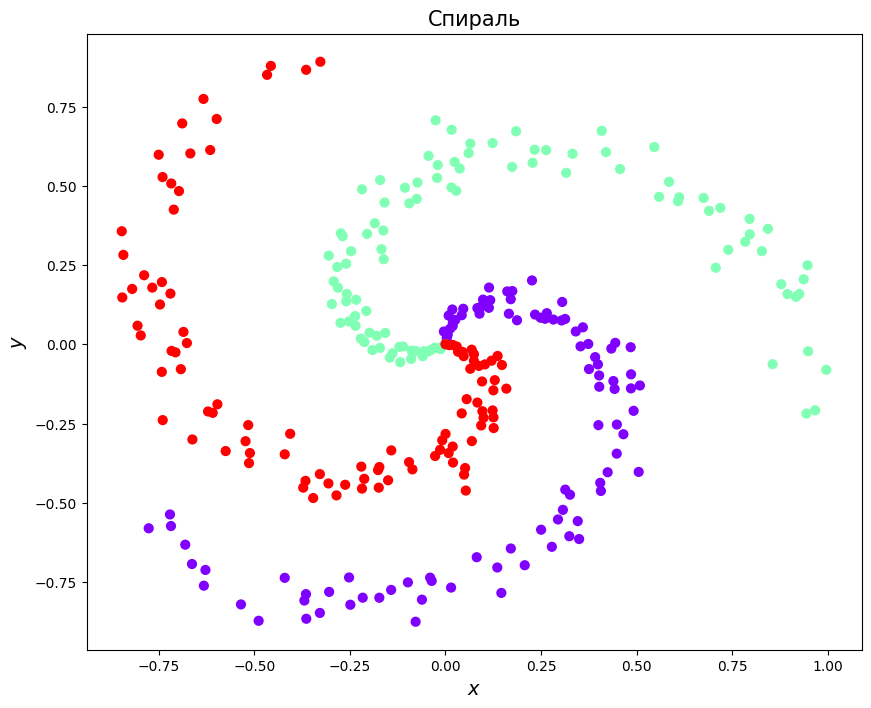

In [3]:
plt.figure(figsize=(10, 8))
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.rainbow)
plt.title('Спираль', fontsize=15)
plt.xlabel('$x$', fontsize=14)
plt.ylabel('$y$', fontsize=14)
plt.show();

In [4]:
print(X.data.shape, y.data.shape)

(300, 2) (300,)


In [5]:
y = keras.utils.to_categorical(y, 3)


In [6]:
from keras import optimizers
two_layer_net=keras.models.Sequential()
two_layer_net.add(keras.layers.Dense(100, input_shape=(X.shape[1],), activation='relu'))
two_layer_net.add(keras.layers.Dense(3, activation='softmax'))
print(two_layer_net.summary())


/home/daniil/study/nn-course/.venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
E0000 00:00:1759488817.743385    8670 cuda_executor.cc:1309] INTERNAL: CUDA Runtime error: Failed call to cudaGetRuntimeVersion: Error loading CUDA libraries. GPU will not be used.: Error loading CUDA libraries. GPU will not be used.
W0000 00:00:1759488817.786747    8670 gpu_device.cc:2342] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 100)            │           300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │           303 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 603 (2.36 KB)

 Trainable params: 603 (2.36 KB)

 Non-trainable params: 0 (0.00 B)

None


In [7]:
#визуализация модели
from keras.utils.vis_utils import plot_model
plot_model(two_layer_net, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

ModuleNotFoundError: No module named 'keras.utils.vis_utils'

In [ ]:
sgd = optimizers.SGD(decay=1e-6, momentum=0.9, nesterov=True, learning_rate=0.01)
two_layer_net.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
history=two_layer_net.fit(X, y, epochs=150, batch_size=64, verbose=0, validation_split=0.2)


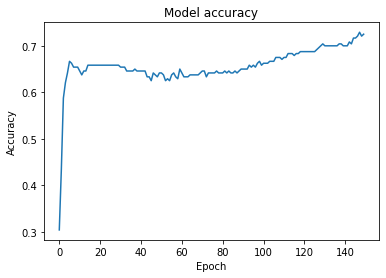

In [ ]:
plt.plot(history.history['accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
#plt.legend(['train','test'])
plt.show()

#Создание многослойной нейросети
Усложним архитектуру нейронной сети прямого распрастронения:

In [ ]:
many_layer_net=keras.models.Sequential()
two_layer_net.add(keras.layers.Dense(100, input_shape=(X.shape[1],), activation='relu'))
two_layer_net.add(keras.layers.Dense(100, activation='relu'))
two_layer_net.add(keras.layers.Dense(100, activation='relu'))
two_layer_net.add(keras.layers.Dense(100, activation='relu'))
two_layer_net.add(keras.layers.Dense(3, activation='softmax'))
sgd = optimizers.SGD(decay=1e-6, momentum=0.9, nesterov=True, learning_rate=0.001)
two_layer_net.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
history=two_layer_net.fit(X, y, epochs=150, batch_size=64, verbose=0, validation_split=0.2)


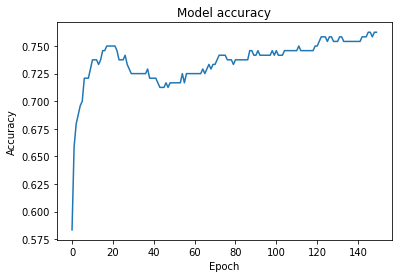

In [ ]:
plt.plot(history.history['accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.show()

#Задание 1
1. Попробовать улучшить результат за счет изменения следующих параметров: скорость обучения, количество эпох, виды оптимизаторов, количество нейронов, количество слоев. Результаты анализа представить в виде графиков (диаграмм)
2. Добавить слой (слои) Dropout (model.add(keras.layers.Dropout(0.5))), посмотреть как измениться результат
3. Добавить слой нормализации (keras.layers.BatchNormalization) и оценить его влияние на качество обучения.  

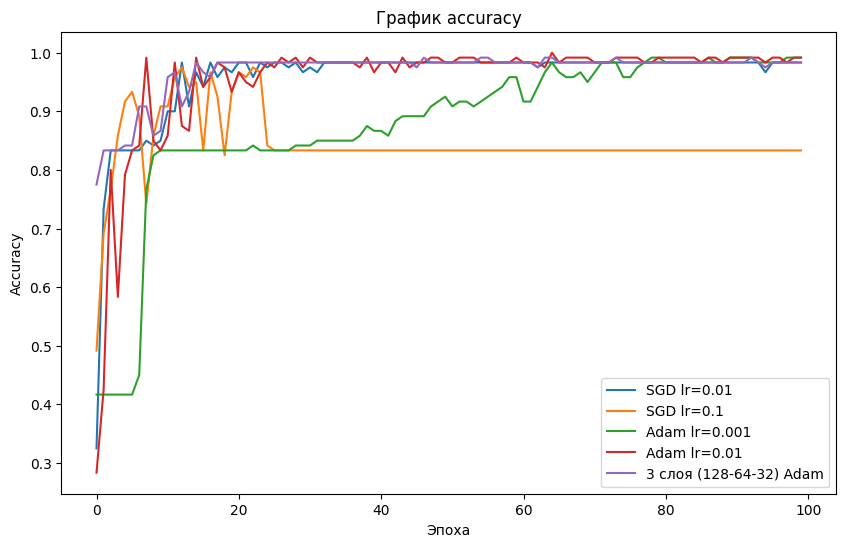

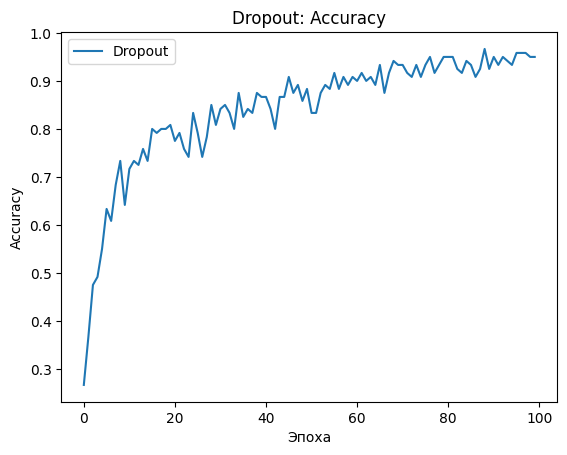

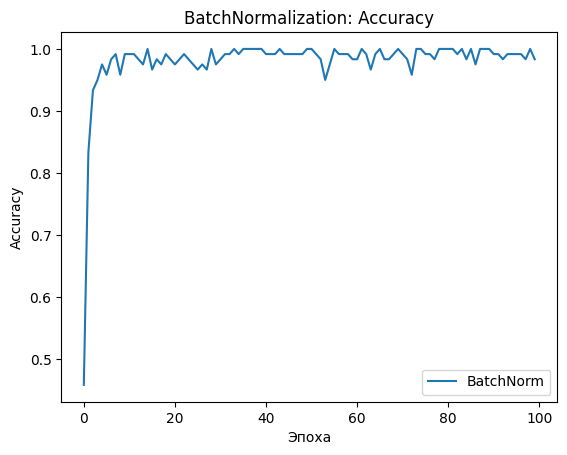

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, optimizers
import matplotlib.pyplot as plt
import numpy as np

def plot_history(histories, labels, metric='accuracy'):
    plt.figure(figsize=(10,6))
    for history, label in zip(histories, labels):
        plt.plot(history.history[metric], label=label)
    plt.title(f'График {metric}')
    plt.xlabel('Эпоха')
    plt.ylabel(metric.capitalize())
    plt.legend()
    plt.show()

histories = []
labels = []

# 1. Изменение параметров: скорость обучения, количество эпох, оптимизаторы, нейроны, слои

# a) SGD, разное lr
for lr in [0.01, 0.1]:
    model = keras.Sequential([
        layers.Dense(64, activation='relu', input_shape=(X.shape[1],)),
        layers.Dense(3, activation='softmax')
    ])
    opt = optimizers.SGD(learning_rate=lr, momentum=0.9, nesterov=True)
    model.compile(loss='sparse_categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
    history = model.fit(X, y, epochs=100, batch_size=32, verbose=0, validation_split=0.2)
    histories.append(history)
    labels.append(f'SGD lr={lr}')

# b) Adam, разное lr
for lr in [0.001, 0.01]:
    model = keras.Sequential([
        layers.Dense(64, activation='relu', input_shape=(X.shape[1],)),
        layers.Dense(3, activation='softmax')
    ])
    opt = optimizers.Adam(learning_rate=lr)
    model.compile(loss='sparse_categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
    history = model.fit(X, y, epochs=100, batch_size=32, verbose=0, validation_split=0.2)
    histories.append(history)
    labels.append(f'Adam lr={lr}')

# c) Больше слоев и нейронов
model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(X.shape[1],)),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(3, activation='softmax')
])
opt = optimizers.Adam(learning_rate=0.001)
model.compile(loss='sparse_categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
history = model.fit(X, y, epochs=100, batch_size=32, verbose=0, validation_split=0.2)
histories.append(history)
labels.append('3 слоя (128-64-32) Adam')

plot_history(histories, labels, metric='accuracy')

# 2. Dropout
model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(X.shape[1],)),
    layers.Dropout(0.5),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(3, activation='softmax')
])
opt = optimizers.Adam(learning_rate=0.001)
model.compile(loss='sparse_categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
history_dropout = model.fit(X, y, epochs=100, batch_size=32, verbose=0, validation_split=0.2)

plt.plot(history_dropout.history['accuracy'], label='Dropout')
plt.title('Dropout: Accuracy')
plt.xlabel('Эпоха')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# 3. BatchNormalization
model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(X.shape[1],)),
    layers.BatchNormalization(),
    layers.Dense(64, activation='relu'),
    layers.BatchNormalization(),
    layers.Dense(3, activation='softmax')
])
opt = optimizers.Adam(learning_rate=0.001)
model.compile(loss='sparse_categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
history_bn = model.fit(X, y, epochs=100, batch_size=32, verbose=0, validation_split=0.2)

plt.plot(history_bn.history['accuracy'], label='BatchNorm')
plt.title('BatchNormalization: Accuracy')
plt.xlabel('Эпоха')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


#Создание многослойной нейросети для классификации ирисов

In [ ]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt


2025-10-02 19:34:25.699880: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2025-10-02 19:34:25.705792: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-10-02 19:34:25.911596: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI AVX512_BF16 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-10-02 19:34:26.574107: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different compu

In [ ]:
iris = load_iris()
X = iris.data  # 4 признака
y = iris.target  # 3 класса
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
num_classes = len(np.unique(y))
y_train_cat = to_categorical(y_train, num_classes)
y_test_cat = to_categorical(y_test, num_classes)

In [ ]:
X_train_scaled.shape

(120, 4)

In [ ]:
model = Sequential()
model.add(Dense(16, input_dim=(X_train_scaled.shape[1]), activation='relu'))
model.add(Dense(num_classes, activation='softmax'))
print(model.summary())


/home/daniil/study/nn-course/.venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
E0000 00:00:1759422875.433678   10808 cuda_executor.cc:1309] INTERNAL: CUDA Runtime error: Failed call to cudaGetRuntimeVersion: Error loading CUDA libraries. GPU will not be used.: Error loading CUDA libraries. GPU will not be used.
W0000 00:00:1759422875.480689   10808 gpu_device.cc:2342] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 16)             │            80 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 131 (524.00 B)

 Trainable params: 131 (524.00 B)

 Non-trainable params: 0 (0.00 B)

None


In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train_scaled, y_train_cat, validation_data=(X_test_scaled, y_test_cat), epochs=15, batch_size=16)

Epoch 1/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7333 - loss: 0.5925 - val_accuracy: 0.7333 - val_loss: 0.5839
Epoch 2/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7667 - loss: 0.5691 - val_accuracy: 0.7667 - val_loss: 0.5639
Epoch 3/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7833 - loss: 0.5473 - val_accuracy: 0.7667 - val_loss: 0.5458
Epoch 4/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7833 - loss: 0.5280 - val_accuracy: 0.7667 - val_loss: 0.5299
Epoch 5/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8000 - loss: 0.5101 - val_accuracy: 0.7667 - val_loss: 0.5156
Epoch 6/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8000 - loss: 0.4935 - val_accuracy: 0.7667 - val_loss: 0.5024
Epoch 7/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8000 - loss: 0.4785 - val_accuracy: 0.7667 - val_loss: 0.4907
Epoch 8/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8000 - loss: 0.4641 - val_accuracy: 0.7667 - val_loss: 0.4799
Epoch 9

In [ ]:
#оценка точности
test_loss, test_acc = model.evaluate(X_test_scaled, y_test_cat)
print('Test accuracy:', test_acc)
print('Test loss:', test_loss)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.8000 - loss: 0.4622
Test accuracy: 0.800000011920929
Test loss: 0.46221858263015747


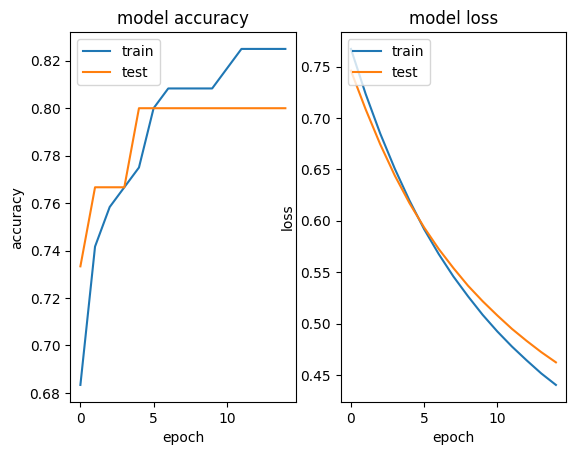

In [ ]:
fig = plt.figure()
ax1 = fig.add_subplot(1,2,1)
ax1.plot(history.history['accuracy'])
ax1.plot(history.history['val_accuracy'])
ax1.set(title='model accuracy')
ax1.set(ylabel='accuracy')
ax1.set(xlabel='epoch')
ax1.legend(['train', 'test'], loc='upper left')
ax2 = fig.add_subplot(1,2,2)
ax2.plot(history.history['loss'])
ax2.plot(history.history['val_loss'])
ax2.set(title='model loss')
ax2.set(ylabel='loss')
ax2.set(xlabel='epoch')
ax2.legend(['train', 'test'], loc='upper left')
plt.show()


##Задание 2
1. Добавь еще один слой в нейросеть, увеличить количество нейронов в первом слое.
2. Между двух слоев нейронной сети добавить слой Dropout
model.add(keras.layers.Dropout(0.3)), переобучить модель, оценить качество обучения.
Объяснить полученные результаты
3. Добавить еще один скрытый слой и проанализировать его влияние на качество обучения модели.

Вариант 1: Один скрытый слой (16 нейронов)
Epoch 1/15


/home/daniil/study/nn-course/.venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.3333 - loss: 1.2215 - val_accuracy: 0.5000 - val_loss: 1.1487
Epoch 2/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4083 - loss: 1.1317 - val_accuracy: 0.5667 - val_loss: 1.0792
Epoch 3/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4750 - loss: 1.0658 - val_accuracy: 0.5667 - val_loss: 1.0223
Epoch 4/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4750 - loss: 1.0022 - val_accuracy: 0.5667 - val_loss: 0.9777
Epoch 5/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4917 - loss: 0.9548 - val_accuracy: 0.5667 - val_loss: 0.9397
Epoch 6/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5000 - loss: 0.9128 - val_accuracy: 0.5667 - val_loss: 0.9089
Epoch 7/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5083 - loss: 0.8753 - val_accuracy: 0.5000 - val_loss: 0.8818
Epoch 8/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5250 - loss: 0.8426 - val_accuracy: 0.4333 - val_loss: 0.8578
Epoch 9/15
8/8 ━━━

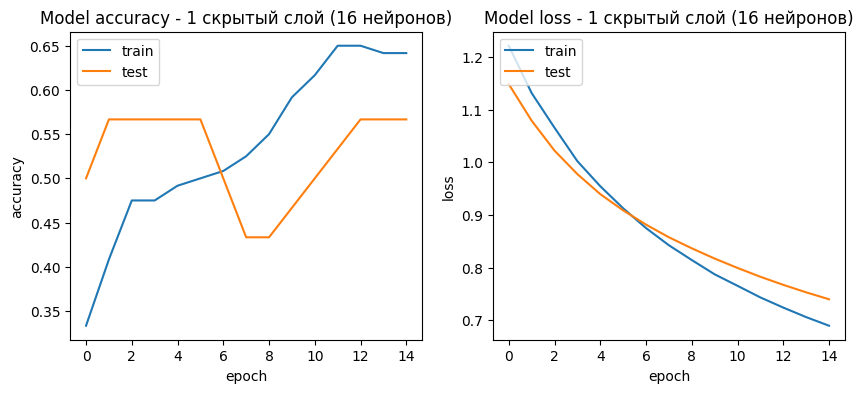

Вариант 2: Dropout между двумя скрытыми слоями
Epoch 1/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.4750 - loss: 1.1126 - val_accuracy: 0.6667 - val_loss: 0.8851
Epoch 2/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5250 - loss: 0.9444 - val_accuracy: 0.7000 - val_loss: 0.7756
Epoch 3/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6167 - loss: 0.8552 - val_accuracy: 0.7000 - val_loss: 0.6899
Epoch 4/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7083 - loss: 0.7530 - val_accuracy: 0.7000 - val_loss: 0.6226
Epoch 5/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7417 - loss: 0.6488 - val_accuracy: 0.7333 - val_loss: 0.5659
Epoch 6/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7417 - loss: 0.6148 - val_accuracy: 0.7333 - val_loss: 0.5178
Epoch 7/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7917 - loss: 0.5004 - val_accuracy: 0.7667 - val_loss: 0.4819
Epoch 8/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7750 - loss: 0.5348 - 

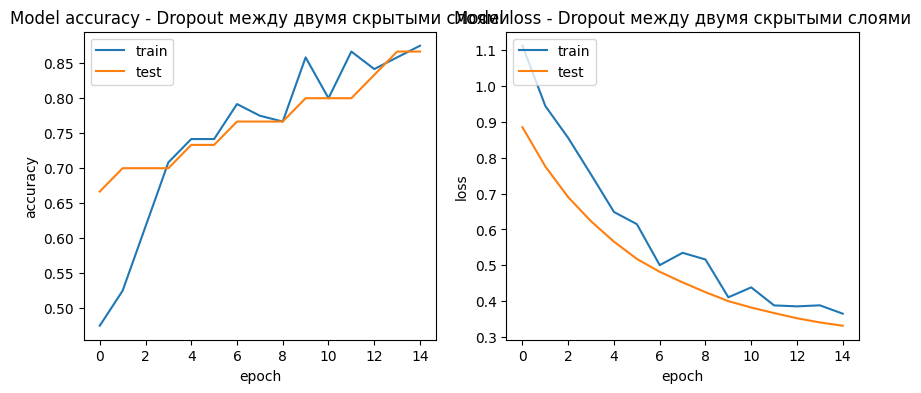

Вариант 3: Три скрытых слоя
Epoch 1/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.3333 - loss: 1.0220 - val_accuracy: 0.3333 - val_loss: 1.0122
Epoch 2/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3333 - loss: 0.9370 - val_accuracy: 0.3333 - val_loss: 0.9398
Epoch 3/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3333 - loss: 0.8672 - val_accuracy: 0.3333 - val_loss: 0.8742
Epoch 4/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3333 - loss: 0.8092 - val_accuracy: 0.3333 - val_loss: 0.8205
Epoch 5/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4083 - loss: 0.7582 - val_accuracy: 0.4667 - val_loss: 0.7707
Epoch 6/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6333 - loss: 0.7130 - val_accuracy: 0.6667 - val_loss: 0.7208
Epoch 7/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7833 - loss: 0.6691 - val_accuracy: 0.7000 - val_loss: 0.6735
Epoch 8/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8333 - loss: 0.6209 - val_accuracy: 0.766

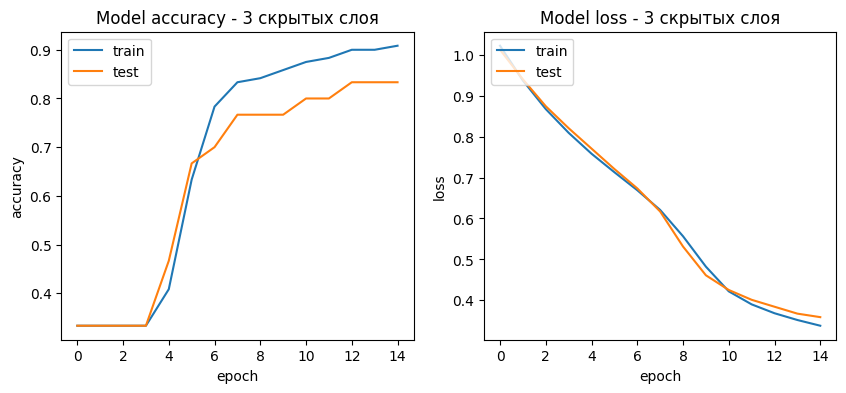

(<Sequential name=sequential_6, built=True>,
 <keras.src.callbacks.history.History at 0x7fe324268dd0>)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout


def build_and_train_model(layers, dropout=None, epochs=15, batch_size=16, verbose=1, plot_title=''):
    model = Sequential()
    input_dim = X_train_scaled.shape[1]
    # Add first layer with input_dim
    units, activation, kernel_init = layers[0]
    model.add(Dense(units, input_dim=input_dim, activation=activation, kernel_initializer=kernel_init))
    # Optionally add dropout
    if dropout is not None:
        model.add(Dropout(dropout))
    # Add remaining layers
    for layer in layers[1:]:
        units, activation, kernel_init = layer
        model.add(Dense(units, activation=activation, kernel_initializer=kernel_init))
    # Compile and fit
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    history = model.fit(
        X_train_scaled, y_train_cat,
        validation_data=(X_test_scaled, y_test_cat),
        epochs=epochs, batch_size=batch_size, verbose=verbose
    )
    # Evaluate
    test_loss, test_acc = model.evaluate(X_test_scaled, y_test_cat, verbose=0)
    print(f'Test accuracy: {test_acc:.4f}')
    print(f'Test loss: {test_loss:.4f}')
    # Plot
    fig = plt.figure(figsize=(10,4))
    ax1 = fig.add_subplot(1,2,1)
    ax1.plot(history.history['accuracy'])
    ax1.plot(history.history['val_accuracy'])
    ax1.set(title='Model accuracy' + (' - ' + plot_title if plot_title else ''))
    ax1.set(ylabel='accuracy')
    ax1.set(xlabel='epoch')
    ax1.legend(['train', 'test'], loc='upper left')
    ax2 = fig.add_subplot(1,2,2)
    ax2.plot(history.history['loss'])
    ax2.plot(history.history['val_loss'])
    ax2.set(title='Model loss' + (' - ' + plot_title if plot_title else ''))
    ax2.set(ylabel='loss')
    ax2.set(xlabel='epoch')
    ax2.legend(['train', 'test'], loc='upper left')
    plt.show()
    return model, history

# 1. Один скрытый слой (16 нейронов)
layers1 = [
    (16, 'relu', 'he_uniform'),
    (num_classes, 'softmax', 'glorot_uniform')
]
print("Вариант 1: Один скрытый слой (16 нейронов)")
build_and_train_model(layers1, plot_title='1 скрытый слой (16 нейронов)')

# 2. Два скрытых слоя, Dropout между ними
layers2 = [
    (32, 'relu', 'he_uniform'),
    (16, 'relu', 'he_uniform'),
    (num_classes, 'softmax', 'glorot_uniform')
]
print("Вариант 2: Dropout между двумя скрытыми слоями")
build_and_train_model(layers2, dropout=0.3, plot_title='Dropout между двумя скрытыми слоями')

# 3. Три скрытых слоя
layers3 = [
    (32, 'relu', 'he_uniform'),
    (16, 'relu', 'he_uniform'),
    (8, 'relu', 'he_uniform'),
    (num_classes, 'softmax', 'glorot_uniform')
]
print("Вариант 3: Три скрытых слоя")
build_and_train_model(layers3, plot_title='3 скрытых слоя')


#Инициализация сети
Важным моментом при конструировании сети является начальная инициализация весов. Удачно выбранный способ инициализации весов может значительно влиять на способность модели к обучению.

Существует различные подходы к начальной инициализации весов.

Например, метод Завьера. Основная идея этого метода — упростить прохождение сигнала через слой во время как прямого, так и обратного распространения ошибки для линейной функции активации (этот метод также хорошо работает для сигмоидной функции, так как участок, где она ненасыщена, также имеет линейный характер). При вычислении весов этот метод опирается на вероятностное распределение.

Метод инициализации Ге (He) — это вариация метода Завьера, больше подходящая функции активации ReLU, компенсирующая тот факт, что эта функция возвращает нуль для половины области определения.

Выделяют также метод ортогональной инициализации.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.8000 - loss: 0.4066
Test accuracy: 0.800000011920929
Test loss: 0.40662702918052673


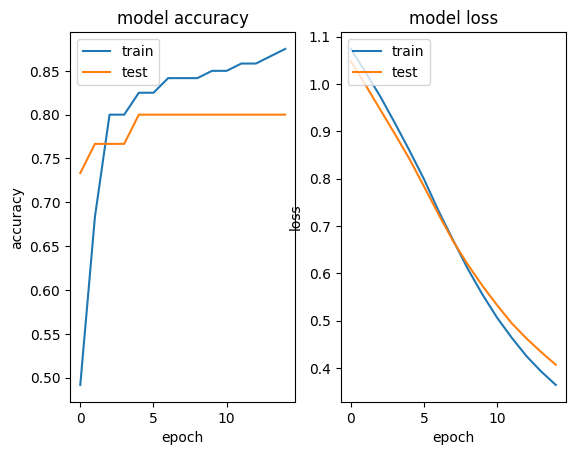

In [ ]:
model_reg = Sequential()
model_reg.add(Dense(16, input_dim=(X_train_scaled.shape[1]), activation='relu', kernel_initializer='he_uniform'))
model_reg.add(Dense(num_classes, activation='softmax', kernel_initializer='glorot_uniform'))

#L2-регуляризация
Одной из основных проблем машинного обучения является проблема переобучения (overfitting), когда модель в погоне за минимизацией затрат на обучение теряет способность к обобщению.

Существует простой способ держать переобучение под контролем — метод dropout.

Но есть и другие регуляризаторы, которые можно применить к сети. Один из них — L_2-регуляризация (также называемая сокращением весов, англ. weight decay), которая использует более прямой подход к регуляризации, чем dropout. Обычно первопричиной переобучения является сложность модели (в смысле количества ее параметров), слишком высокая для решаемой задачи и имеющегося обучающего множества. В некотором смысле, задача регуляризатора — понизить сложность модели, сохранив количество ее параметров.

L_2-регуляризация выполняется посредством наложения штрафов (penalising) на веса с наибольшими значениями, минимизируя их L_2-норму с использованием параметра λ — коэффициент регуляризации, выражающий предпочтение минимизации нормы относительно минимизации потерь на обучающем множестве.

Крайне важно правильно выбрать λ. Если коэффициент слишком мал, то эффект от регуляризации будет ничтожен, если же слишком велик — модель обнулит все веса.

In [ ]:
from keras.regularizers import l2
l2_lambda = 0.0001
model_reg = Sequential()
model_reg.add(Dense(16, input_dim=(X_train_scaled.shape[1]), activation='relu',kernel_initializer='he_uniform', bias_regularizer=l2(l2_lambda)))
model_reg.add(Dense(num_classes, activation='softmax', kernel_initializer='glorot_uniform'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model_reg.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history=model_reg.fit(X_train_scaled, y_train_cat, validation_data=(X_test_scaled, y_test_cat), epochs=15, batch_size=16)

Epoch 1/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - accuracy: 0.3460 - loss: 1.1362 - val_accuracy: 0.3667 - val_loss: 1.0482
Epoch 2/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.3722 - loss: 1.0335 - val_accuracy: 0.4000 - val_loss: 0.9839
Epoch 3/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.4393 - loss: 0.9630 - val_accuracy: 0.4000 - val_loss: 0.9273
Epoch 4/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.4509 - loss: 0.9000 - val_accuracy: 0.4333 - val_loss: 0.8774
Epoch 5/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5406 - loss: 0.8101 - val_accuracy: 0.4667 - val_loss: 0.8345
Epoch 6/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5372 - loss: 0.8095 - val_accuracy: 0.5667 - val_loss: 0.7964
Epoch 7/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5796 - loss: 0.7410 - val_accuracy: 0.5667 - val_loss: 0.7622
Epoch 8/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6281 - loss: 0.6798 - val_accuracy: 0.6333 - val_loss: 0.7326


In [ ]:
test_loss, test_acc = model.evaluate(X_test_scaled, y_test_cat)
print('Test accuracy:', test_acc)
print('Test loss:', test_loss)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.8000 - loss: 0.4622
Test accuracy: 0.800000011920929
Test loss: 0.46221858263015747


##Задание 3
Измените коэффициент регуляризации на значение 0.5; 0.01 и 1, оцените влияние значения коэффициента на точность сети

Попробуйте использовать схему регуляризации L1 (bias_regularizer=tf.keras.regularizers.l1(0.0001)), сравните точности модели при L1 и L2 регуляризации.



In [ ]:
from enum import StrEnum
from keras.regularizers import l2, l1

class Regularization(StrEnum):
    L2 = 'l2'
    L1 = 'l1'

def build_and_train_model(reg_type: Regularization = Regularization.L2, reg_value=0.0001, epochs=15, batch_size=16):
    if reg_type == Regularization.L2:
        regularizer = l2(reg_value)
    elif reg_type == Regularization.L1:
        regularizer = l1(reg_value)
    else:
        raise ValueError("reg_type must be 'l1' or 'l2'")

    model = Sequential()
    model.add(Dense(
        16,
        input_dim=X_train_scaled.shape[1],
        activation='relu',
        kernel_initializer='he_uniform',
        bias_regularizer=regularizer
    ))
    model.add(Dense(num_classes, activation='softmax', kernel_initializer='glorot_uniform'))

    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    history = model.fit(
        X_train_scaled, y_train_cat,
        validation_data=(X_test_scaled, y_test_cat),
        epochs=epochs, batch_size=batch_size, verbose=0
    )

    test_loss, test_acc = model.evaluate(X_test_scaled, y_test_cat, verbose=0)
    print(f"Регуляризация: {reg_type.upper()}, коэффициент: {reg_value}")
    print('Test accuracy:', test_acc)
    print('Test loss:', test_loss)
    return model, history

for reg_val in [0.5, 0.01, 1]:
    build_and_train_model(reg_type=Regularization.L2, reg_value=reg_val)

build_and_train_model(reg_type=Regularization.L1, reg_value=0.0001)

/home/daniil/study/nn-course/.venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Регуляризация: L2, коэффициент: 0.5
Test accuracy: 0.7333333492279053
Test loss: 0.49788352847099304
Регуляризация: L2, коэффициент: 0.01
Test accuracy: 0.7333333492279053
Test loss: 0.5704206824302673
Регуляризация: L2, коэффициент: 1
Test accuracy: 0.800000011920929
Test loss: 0.5256803631782532
Регуляризация: L1, коэффициент: 0.0001
Test accuracy: 0.6333333253860474
Test loss: 0.7060922384262085


(<Sequential name=sequential_15, built=True>,
 <keras.src.callbacks.history.History at 0x7fe29419ca40>)

##Применение обученной нейронной сети


In [ ]:
sample_idx = 10
sample = X_test_scaled[sample_idx].reshape(1, -1)
pred_prob = model.predict(sample)
pred_class = np.argmax(pred_prob, axis=1)[0]
print(f"Предсказанный класс: {pred_class}, истинный: {y_test[sample_idx]}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Предсказанный класс: 2, истинный: 2


In [ ]:
#сохранение модели
model.save('model.h5')

#загрузка модели
#model_load=keras.models.load_model('model.h5')

##Задание 4
Подобрать архитектуру многослойной модели НС для решения задачи классификации ирисов с точностью не менее 90%

In [5]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np

from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# One-hot encoding
y_train_cat = to_categorical(y_train, num_classes=3)
y_test_cat = to_categorical(y_test, num_classes=3)

model = keras.Sequential([
    layers.Dense(20, activation='relu', input_dim=(X_train_scaled.shape[1])),
    # layers.Dense(32, activation='relu'),
    layers.Dense(3, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_train_scaled, y_train_cat, epochs=50, batch_size=8, 
                    validation_split=0.2, verbose=0)

test_loss, test_acc = model.evaluate(X_test_scaled, y_test_cat, verbose=0)
print(f"Test accuracy: {test_acc:.4f}")

if test_acc >= 0.9:
    print("Требуемая точность достигнута!")
else:
    print("Требуемая точность не достигнута.")


/home/daniil/study/nn-course/.venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Test accuracy: 0.8667
Требуемая точность не достигнута.
